## Replication Fig 2a and 2b 

In this notebook, we compare the wavelengths at which the peaks happen. 
We extracted the peaks coordinates from Ellis et al 2016, by digitizing the plots. We will only use the wavenumber information for comparison. 

In [1]:
import numpy
from matplotlib import pyplot, rcParams
%matplotlib inline

In [2]:
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
rcParams['axes.linewidth'] = 1

In [3]:
#Pygbe simulation data
w_LE, cext_LE = numpy.loadtxt('results_data/iso_pillar_AR4_22/iso_pillar_AR4_22_LE_800-1000cm-1_in_ang.txt',
                             skiprows=1, unpack=True)
w_SE, cext_SE = numpy.loadtxt('results_data/iso_pillar_AR4_22/iso_pillar_AR4_22_SE_800-1000cm-1_in_ang.txt',
                             skiprows=1, unpack=True)

In [4]:
w_SE_cm = 1/(w_SE*1e-8)
w_LE_cm = 1/(w_LE*1e-8)

## Digitized data (experiments)

In [5]:
#Figure 2a - parallel data wavenumber
w_LE_red, ref_LE_red = numpy.loadtxt('ellis_fig2_digit/fig2a_par_red_full.csv', delimiter=',', unpack=True)

#Figure 2b - perpendicular data wavenumber
w_SE_red, ref_SE_red = numpy.loadtxt('ellis_fig2_digit/fig2b_perp_red_full.csv', delimiter=',', unpack=True)


This are just the peaks

In [6]:
#Figure 2a - parallel data wavenumber just peaks
w_LE_red_peaks, ref_LE_peaks = numpy.loadtxt('ellis_fig2_digit/just_peaks/fig2a_parallel_red.csv', delimiter=',', unpack=True)

#Figure 2b - perpendicular data wavenumber just peaks
w_SE_red_peaks, ref_SE_peaks = numpy.loadtxt('ellis_fig2_digit/just_peaks/fig2b_perp_red.csv', delimiter=',', unpack=True)

Original peaks from digitized data where they indicated arrows on their paper. 

In [7]:
w_LE_red_peaks

array([ 864.40677966,  886.01694915,  908.47457627,  915.6779661 ,
        951.69491525])

In [8]:
w_SE_red_peaks

array([ 883.27364244,  904.12835156,  917.71367728,  937.51814926,
        954.99951602,  960.90407511])

## Figure 2a

In [9]:
from scipy.signal import argrelextrema

Peaks from our simulations

In [10]:
idx_peaks_LE = argrelextrema(cext_LE, numpy.greater)[0]
w_LE_peaks_pygbe = w_LE_cm[idx_peaks_LE]


w_LE_peaks_pygbe

array([ 876.18623978,  901.28097515,  921.61752613,  929.32046909,
        946.63915962,  957.3254158 ])

In [11]:
w_pygbe_m12_LE = w_LE_peaks_pygbe -12.17
w_pygbe_m12_LE

array([ 864.01623978,  889.11097515,  909.44752613,  917.15046909,
        934.46915962,  945.1554158 ])

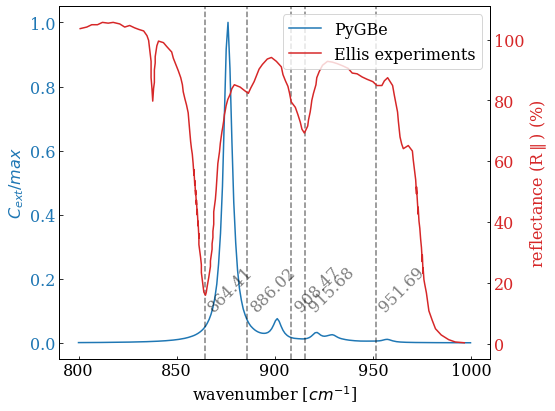

In [12]:
fig, ax1 = pyplot.subplots(figsize=(8, 6))
color = 'C0'
ax1.set_xlabel('wavenumber [$cm^{-1}$]')
ax1.set_ylabel('$C_{ext}/ max$', color=color)
ax1.plot(w_LE_cm, cext_LE/cext_LE.max(), label='PyGBe', ls='-', c=color)
ax1.tick_params(axis='y', labelcolor=color)
pyplot.tick_params(direction='in')

#for pw in w_LE_peaks_pygbe:
#    ax1.axvline(x=pw, c='k',alpha=0.5, ls='--')
#    ax1.text(x=pw, y=0.1, s=f'{pw:.2f}' , rotation=45, c='k', alpha=0.5)

for pw in w_LE_red_peaks:
    ax1.axvline(x=pw, c='k',alpha=0.5, ls='--')
    ax1.text(x=pw, y=0.1, s=f'{pw:.2f}' , rotation=45, c='k', alpha=0.5)


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'C3'
ax2.set_ylabel('reflectance (R$\parallel$) (%)', color=color)  # we already handled the x-label with ax1
ax2.plot(w_LE_red, ref_LE_red, color=color, label='Ellis experiments')
ax2.tick_params(axis='y', labelcolor=color)
pyplot.tick_params(direction='in')

fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

fig.tight_layout() 

pyplot.savefig('AR_rep_val_figs/pygbe_vs_exp_fig2a_Ellis.pdf', format='pdf', bbox_inches='tight', pad_inches=0.1)

## First order approximation (-12.17 )

If we subtract the difference between black curve and red curve  for AR=4 in figure S4 in supplementary material of Ellis et al 2016. 

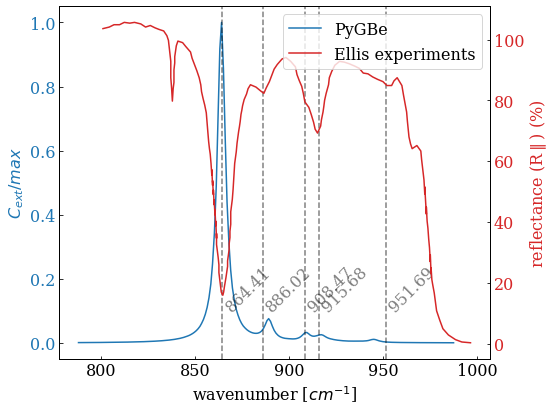

In [13]:
fig, ax1 = pyplot.subplots(figsize=(8, 6))
color = 'C0'
ax1.set_xlabel('wavenumber [$cm^{-1}$]')
ax1.set_ylabel('$C_{ext}/ max$', color=color)
ax1.plot(w_LE_cm-12.17, cext_LE/cext_LE.max(), label='PyGBe', ls='-', c=color)
ax1.tick_params(axis='y', labelcolor=color)
pyplot.tick_params(direction='in')

#for pw in w_pygbe_m12:
#    ax1.axvline(x=pw, c='k', alpha=0.5, ls='--')
#    ax1.text(x=pw, y=0.1, s=f'{pw:.2f}' , rotation=45, c='k', alpha=0.6, fontsize=13)

for pw in w_LE_red_peaks:
    ax1.axvline(x=pw, c='k',alpha=0.5, ls='--')
    ax1.text(x=pw, y=0.1, s=f'{pw:.2f}' , rotation=45, c='k', alpha=0.5)


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'C3'
ax2.set_ylabel('reflectance (R$\parallel$) (%)', color=color)  # we already handled the x-label with ax1
ax2.plot(w_LE_red, ref_LE_red, color=color, label='Ellis experiments')
ax2.tick_params(axis='y', labelcolor=color)
pyplot.tick_params(direction='in')

fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

fig.tight_layout() 
pyplot.savefig('AR_rep_val_figs/validation_FOA_fig2a_Ellis.pdf', format='pdf', bbox_inches='tight', pad_inches=0.1)

## Figure 2a replication of simulations

In [14]:
#Figure 2a - parallel data wavenumber
w_LE_green, ref_LE_green = numpy.loadtxt('ellis_fig2_digit/full_green_parallel_2a.csv', delimiter=',', unpack=True)


## Digitized peak values of experiments

In [15]:
#Figure 2a - parallel data wavenumber just peaks
w_LE_green_peaks, ref_LE_green_peaks = numpy.loadtxt('ellis_fig2_digit/just_peaks/fig2a_parallel_green.csv', delimiter=',', unpack=True)

If we subtract the difference between black curve and red curve  for AR=4 in figure S4 in supplementary material of Ellis et al 2016. 

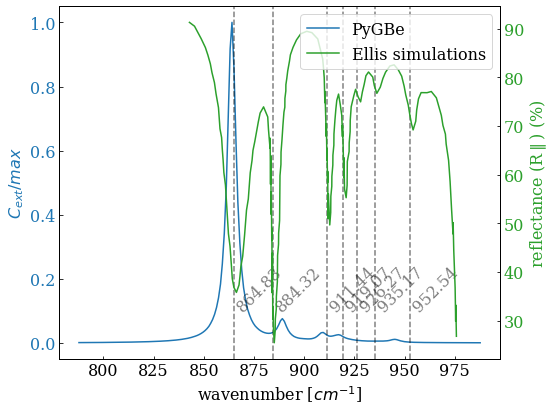

In [16]:
fig, ax1 = pyplot.subplots(figsize=(8, 6))
color = 'C0'
ax1.set_xlabel('wavenumber [$cm^{-1}$]')
ax1.set_ylabel('$C_{ext}/ max$', color=color)
ax1.plot(w_LE_cm-12.17, cext_LE/cext_LE.max(), label='PyGBe', ls='-', c=color)
ax1.tick_params(axis='y', labelcolor=color)
pyplot.tick_params(direction='in')

#for pw in w_pygbe_m12:
#    ax1.axvline(x=pw, c='k', alpha=0.5, ls='--')
#    ax1.text(x=pw, y=0.1, s=f'{pw:.2f}' , rotation=45, c='k', alpha=0.6, fontsize=13)

for pw in w_LE_green_peaks:
    ax1.axvline(x=pw, c='k',alpha=0.5, ls='--')
    ax1.text(x=pw, y=0.1, s=f'{pw:.2f}' , rotation=45, c='k', alpha=0.5)


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'C2'
ax2.set_ylabel('reflectance (R$\parallel$) (%)', color=color)  # we already handled the x-label with ax1
ax2.plot(w_LE_green, ref_LE_green, color=color, label='Ellis simulations')
ax2.tick_params(axis='y', labelcolor=color)
pyplot.tick_params(direction='in')

fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

fig.tight_layout() 
pyplot.savefig('AR_rep_val_figs/replication_FOA_fig2a_Ellis.pdf', format='pdf', bbox_inches='tight', pad_inches=0.1)

## FIgure 2b  ---> we can't validate this one, but let's see how it looks

Peaks from our simulations

In [17]:
idx_peaks_SE = argrelextrema(cext_SE, numpy.greater)[0]
w_SE_peaks_pygbe = w_SE_cm[idx_peaks_SE]


w_SE_peaks_pygbe

array([ 804.80316217,  901.28097515,  920.60007828,  936.01372624,
        960.17295904])

In [18]:
w_pygbe_m12_SE = w_SE_peaks_pygbe -12.17
w_pygbe_m12_SE

array([ 792.63316217,  889.11097515,  908.43007828,  923.84372624,
        948.00295904])

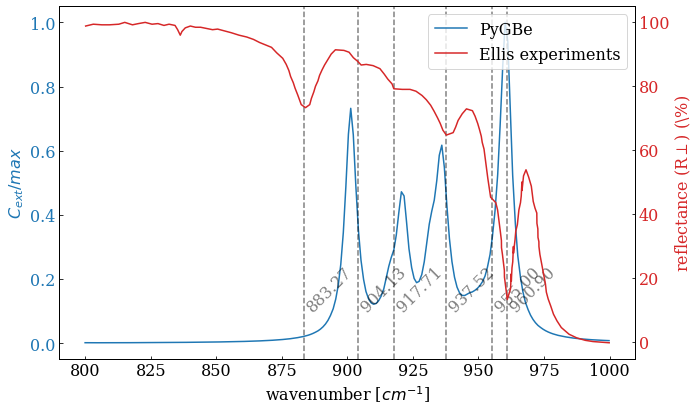

In [19]:
fig, ax1 = pyplot.subplots(figsize=(10, 6))
color = 'C0'
ax1.set_xlabel('wavenumber [$cm^{-1}$]')
ax1.set_ylabel('$C_{ext}/ max$', color=color)
ax1.plot(w_SE_cm, cext_SE/cext_SE.max(), label='PyGBe', ls='-', c=color)
ax1.tick_params(axis='y', labelcolor=color)
pyplot.tick_params(direction='in')

#for pw in w_LE_peaks_pygbe:
#    ax1.axvline(x=pw, c='k',alpha=0.5, ls='--')
#    ax1.text(x=pw, y=0.1, s=f'{pw:.2f}' , rotation=45, c='k', alpha=0.5)

for pw in w_SE_red_peaks:
    ax1.axvline(x=pw, c='k',alpha=0.5, ls='--')
    ax1.text(x=pw, y=0.1, s=f'{pw:.2f}' , rotation=45, c='k', alpha=0.5)


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'C3'
ax2.set_ylabel('reflectance (R$\perp$) (\%)', color=color)  # we already handled the x-label with ax1
ax2.plot(w_SE_red, ref_SE_red, color=color, label='Ellis experiments')
ax2.tick_params(axis='y', labelcolor=color)
pyplot.tick_params(direction='in')

fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

fig.tight_layout() 

## First order approximation (-12.17 ) 
**Not sure if this is valid, since we don't know how it changes the perpendicular curve**

If we subtract the difference between black curve and red curve  for AR=4 in figure S4 in supplementary material of Ellis et al 2016. 

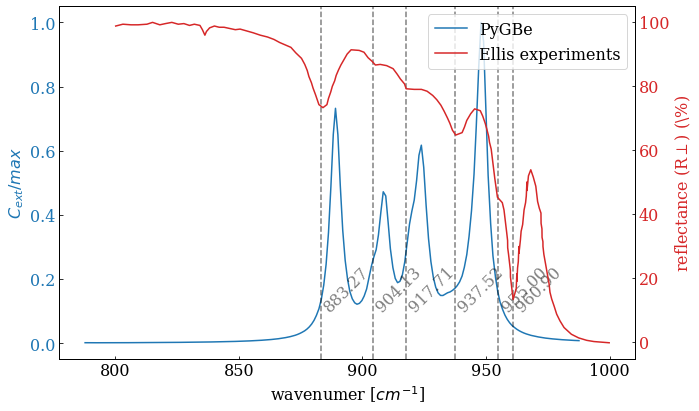

In [20]:
fig, ax1 = pyplot.subplots(figsize=(10, 6))
color = 'C0'
ax1.set_xlabel('wavenumer [$cm^{-1}$]')
ax1.set_ylabel('$C_{ext}/ max$', color=color)
ax1.plot(w_SE_cm-12.17, cext_SE/cext_SE.max(), label='PyGBe', ls='-', c=color)
ax1.tick_params(axis='y', labelcolor=color)
pyplot.tick_params(direction='in')

#for pw in w_pygbe_m12:
#    ax1.axvline(x=pw, c='k', alpha=0.5, ls='--')
#    ax1.text(x=pw, y=0.1, s=f'{pw:.2f}' , rotation=45, c='k', alpha=0.6, fontsize=13)

for pw in w_SE_red_peaks:
    ax1.axvline(x=pw, c='k',alpha=0.5, ls='--')
    ax1.text(x=pw, y=0.1, s=f'{pw:.2f}' , rotation=45, c='k', alpha=0.5)


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'C3'
ax2.set_ylabel('reflectance (R$\perp$) (\%)', color=color)  # we already handled the x-label with ax1
ax2.plot(w_SE_red, ref_SE_red, color=color, label='Ellis experiments')
ax2.tick_params(axis='y', labelcolor=color)
pyplot.tick_params(direction='in')

fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

fig.tight_layout() 

In [21]:
w_LE_peaks_pygbe

array([ 876.18623978,  901.28097515,  921.61752613,  929.32046909,
        946.63915962,  957.3254158 ])

In [22]:
w_SE_peaks_pygbe

array([ 804.80316217,  901.28097515,  920.60007828,  936.01372624,
        960.17295904])

In [23]:
w_LE_red_peaks

array([ 864.40677966,  886.01694915,  908.47457627,  915.6779661 ,
        951.69491525])

In [24]:
w_SE_red_peaks

array([ 883.27364244,  904.12835156,  917.71367728,  937.51814926,
        954.99951602,  960.90407511])